# Survey Model 

## Imports

In [1]:
import sys
sys.path.insert(0, '../utils')
import model_utils
import data_utils

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

## File Locations

In [2]:
# Google Cloud Storage
bucket_name = 'tm-geospatial'
directory = 'poverty-prediction-datasets'

# Destination paths
dhs_features_file = '../data/dhs_features.csv'
dhs_indicators_file = '../data/dhs_indicators.csv'
osm_roads_file = '../data/osm_roads.csv'
osm_buildings_file = '../data/osm_buildings.csv'

## Download Datasets

In [3]:
# Download from Google Cloud Storage
data_utils.download_from_bucket('dhs_features.csv', directory, dhs_features_file, bucket_name);
data_utils.download_from_bucket('dhs_indicators.csv', directory, dhs_indicators_file, bucket_name);
data_utils.download_from_bucket('osm_roads.csv', directory, osm_roads_file, bucket_name);
data_utils.download_from_bucket('osm_buildings.csv', directory, osm_buildings_file, bucket_name);

../data/dhs_features.csv successfully downloaded
../data/dhs_indicators.csv successfully downloaded
../data/osm_roads.csv successfully downloaded
../data/osm_buildings.csv successfully downloaded


## Load Datasets

In [4]:
# Load DHS features and indicators
dhs_features = pd.read_csv(dhs_features_file)
dhs_indicators = pd.read_csv(dhs_indicators_file)
dhs = dhs_features.merge(dhs_indicators, on='Cluster number')

# Load OSM features
roads = pd.read_csv(osm_roads_file)
buildings = pd.read_csv(osm_buildings_file)
osm = roads.merge(buildings, on='DHSCLUST')

# Merge DHS with OSM 
dhs = dhs.merge(osm, left_on='Cluster number', right_on='DHSCLUST')
dhs_features_cols = list(dhs_features.columns[2:]) + list(osm.columns[1:]);

## Spearman and Pearsons Correlations

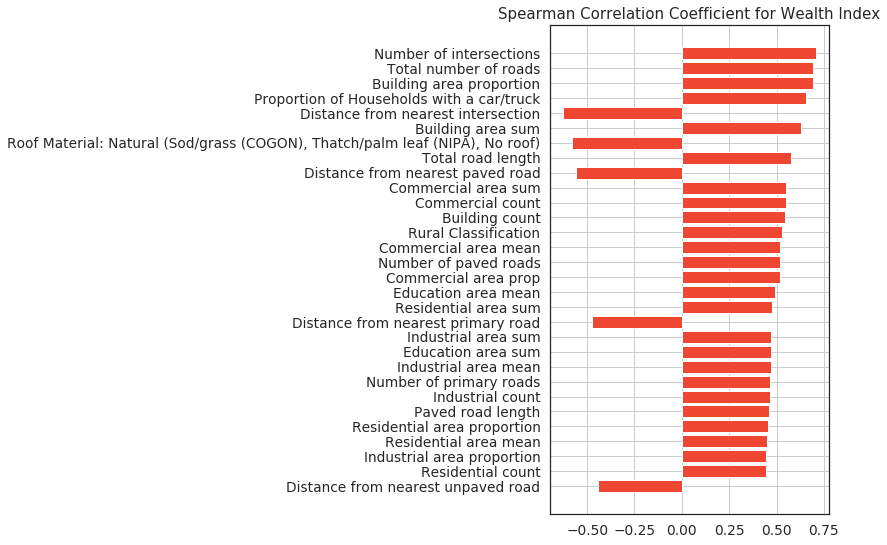

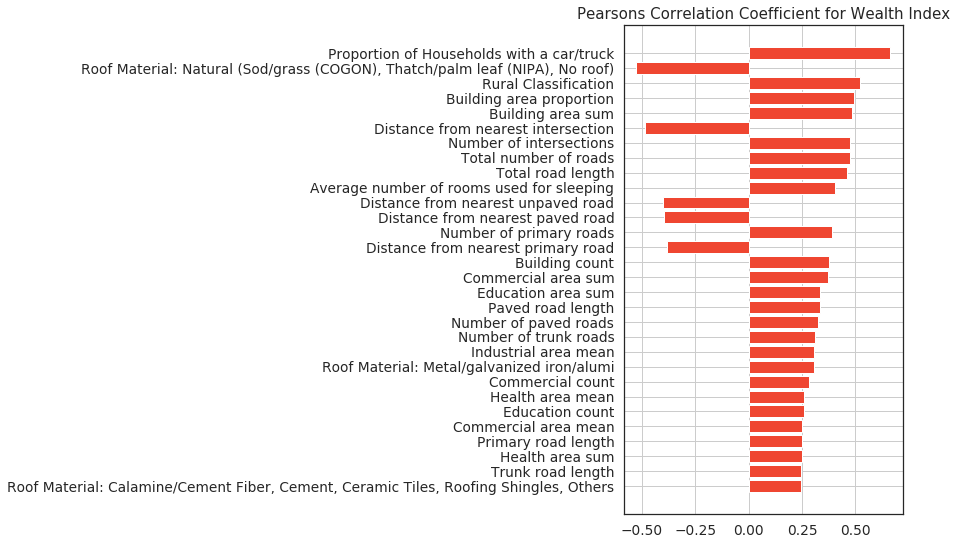

In [5]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
dhs['Rural Classification'] = encoder.fit_transform(dhs['Rural Classification'])

data_utils.plot_corr(
    data=dhs,
    features_cols=dhs_features_cols,
    indicator = 'Wealth Index',
    figsize=(5,9)
)

## Machine Learning Pipeline

### Configuration

In [7]:
# Scoring metrics
scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error'
}

# Indicators of interest
indicators = [
    'Wealth Index',
    'Log Wealth Index',
    'Education completed (years)',
    'Access to electricity',
    'Access to water (minutes)'
]

### Random Forest Regressor

Socioeconomic indicator: Wealth Index
fit_time : 1450.1151
[1454.31540322 1448.36806011 1455.69907999 1453.93063712 1438.26222086]
train_r2 : 0.9258
[0.92645653 0.92134346 0.92548234 0.93027305 0.9254746 ]
test_neg_mse : -1138741315.2760
[-1.11902950e+09 -1.31571038e+09 -9.04751603e+08 -1.19176554e+09
 -1.16244955e+09]
train_neg_mse : -373304136.9819
[-3.66411956e+08 -3.88626604e+08 -3.86749160e+08 -3.46677800e+08
 -3.78055165e+08]
test_r2 : 0.7734
[0.78201971 0.7563893  0.79394488 0.77308921 0.76133132]
score_time : 1.0968
[1.21485162 0.84755182 1.06074762 1.05400419 1.30695128]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1506, n_jobs=-1,
           oob_score=False, random_state=4

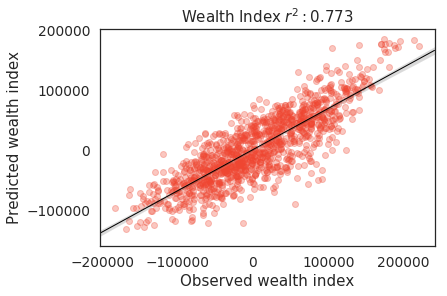

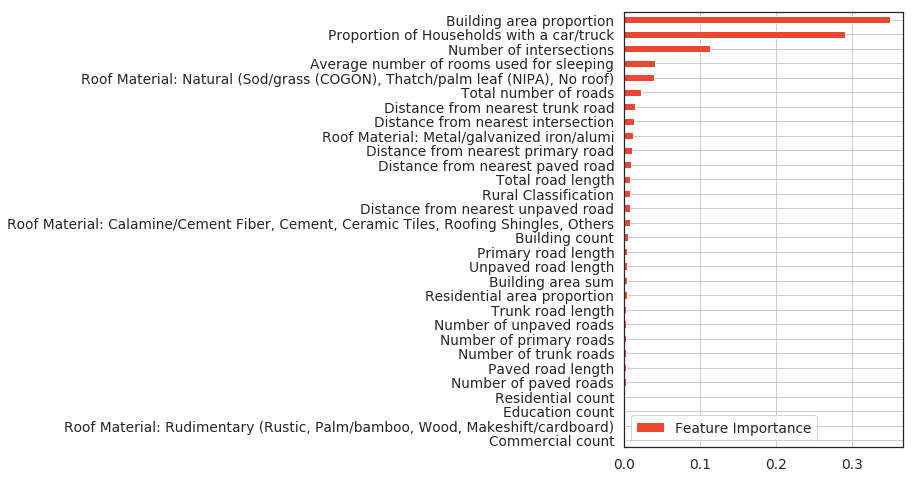

Socioeconomic indicator: Log Wealth Index
fit_time : 1508.6388
[1514.24244475 1514.74141192 1503.89926863 1511.9496882  1498.36124492]
train_r2 : 0.7992
[0.58571163 0.95379766 0.94882907 0.92345149 0.58406665]
test_neg_mse : -0.1623
[-0.05162924 -0.06636704 -0.06283728 -0.55468783 -0.07584646]
train_neg_mse : -0.0689
[-0.14786381 -0.01621478 -0.0181537  -0.01527157 -0.14696947]
test_r2 : 0.6061
[0.71872464 0.68736215 0.6811418  0.3185253  0.62477824]
score_time : 1.1259
[1.0210793  1.14636445 1.00302887 1.49459457 0.96431565]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1347, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


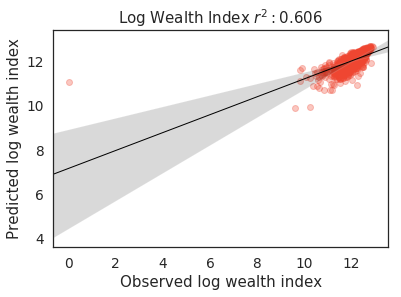

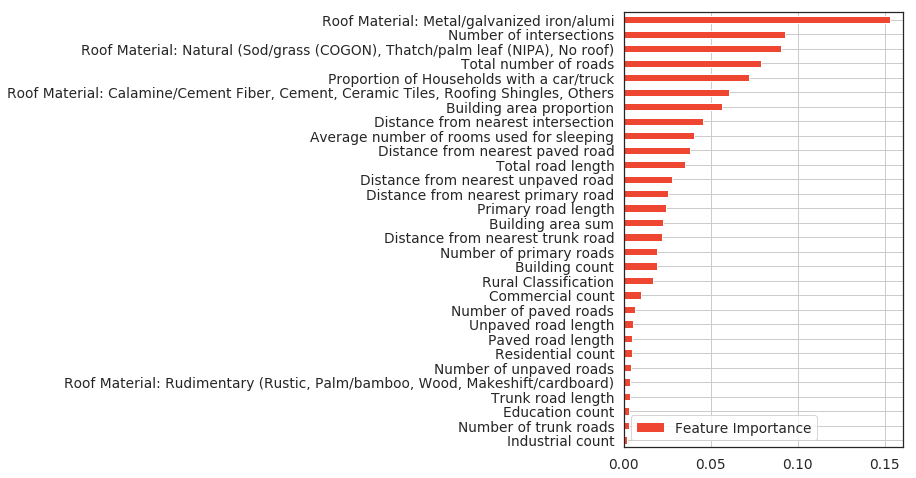

Socioeconomic indicator: Education completed (years)
fit_time : 1478.2772
[1479.24235964 1470.55668116 1483.12488174 1485.24024796 1473.22188592]
train_r2 : 0.8556
[0.85988334 0.84229876 0.8677943  0.84815602 0.86004881]
test_neg_mse : -2.1608
[-2.00463188 -2.4071801  -2.24813284 -2.07268477 -2.07152815]
train_neg_mse : -0.7943
[-0.78518586 -0.84327406 -0.73560482 -0.82452326 -0.78300316]
test_r2 : 0.6054
[0.60386233 0.60872233 0.57137915 0.64383674 0.59895798]
score_time : 1.2441
[1.54276824 1.02968097 0.94860911 1.18655682 1.51288533]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1506, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


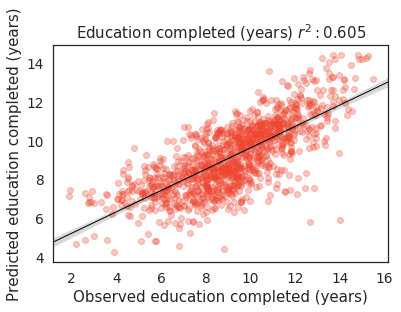

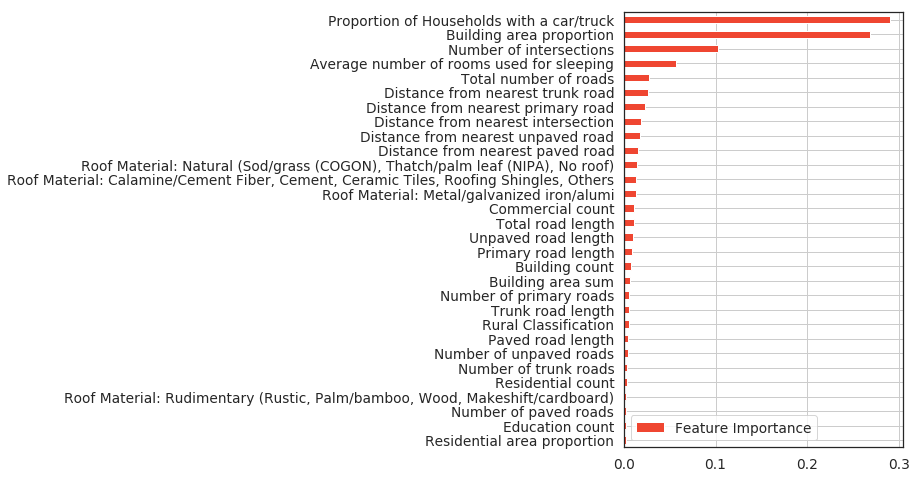

Socioeconomic indicator: Access to electricity
fit_time : 1392.1752
[1383.63996887 1395.66223669 1392.58955288 1393.21603465 1395.7680347 ]
train_r2 : 0.7402
[0.72782266 0.72125452 0.70908724 0.8690613  0.67381912]
test_neg_mse : -0.0130
[-0.00917654 -0.01333488 -0.01385487 -0.01514548 -0.01363576]
train_neg_mse : -0.0055
[-0.00628366 -0.00601116 -0.0059418  -0.00258911 -0.00676675]
test_r2 : 0.3681
[0.28940964 0.30951287 0.41909597 0.42491268 0.39765367]
score_time : 1.0162
[0.68016601 0.90282226 0.98440146 1.38494921 1.12873387]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1228, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


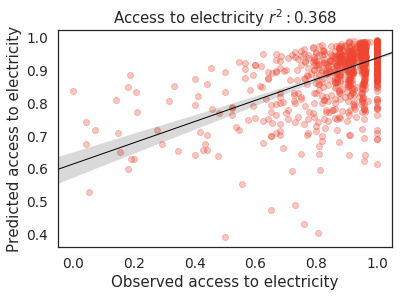

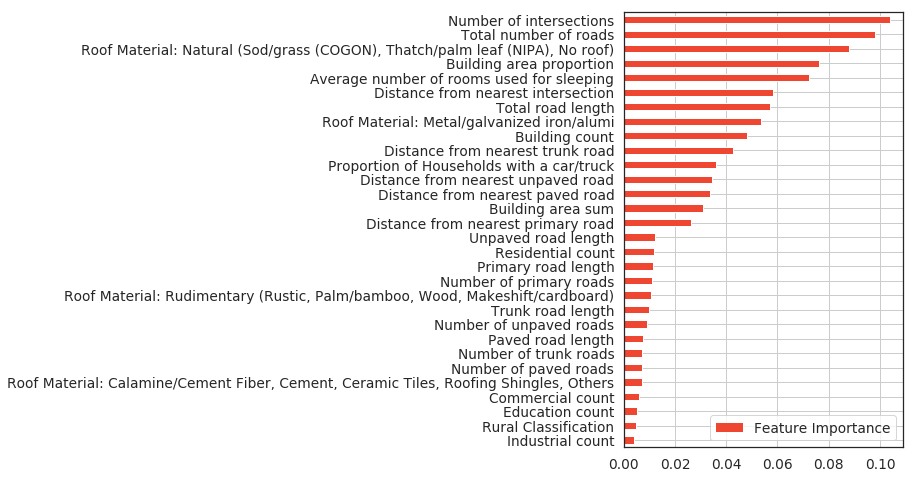

Socioeconomic indicator: Access to water (minutes)
fit_time : 1199.9784
[1177.99711704 1203.8140161  1205.13259506 1208.10266852 1204.84545374]
train_r2 : 0.2916
[0.41502336 0.25197325 0.25128929 0.27886036 0.26098486]
test_neg_mse : -63.6952
[-155.97132661  -64.733614    -44.86302561  -24.60115947  -28.30667634]
train_neg_mse : -48.4424
[-24.39539652 -50.14685059 -54.66464298 -56.21399037 -56.79136265]
test_r2 : 0.0295
[ 0.07792812  0.05418298 -0.00801671 -0.00379105  0.02727617]
score_time : 0.8694
[1.15965152 0.84048867 0.48155069 1.06442547 0.80069184]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=7,
           min_weight_fraction_leaf=0.0, n_estimators=495, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=

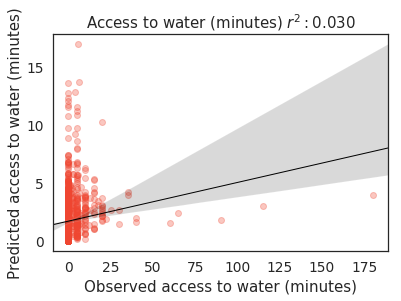

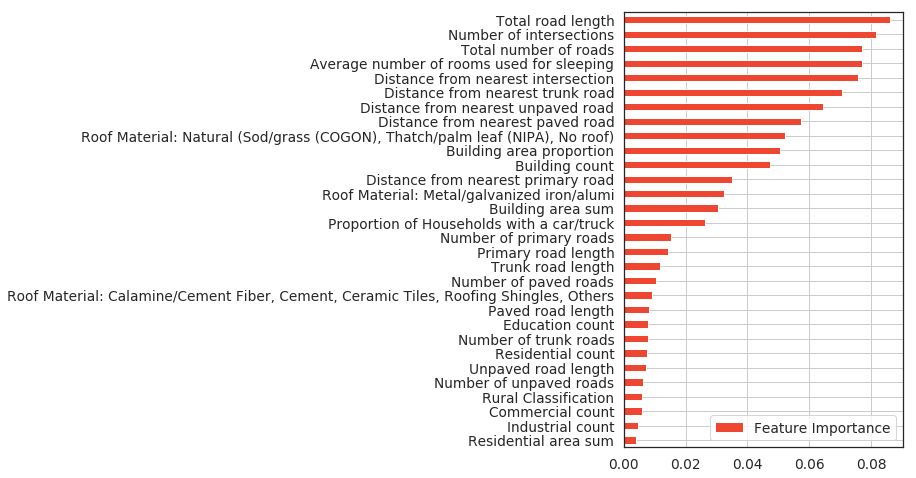

In [6]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=dhs_features_cols, 
    indicator_cols=indicators,
    scoring=scoring,
    model_type='random_forest', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=50, 
    plot_importance=True
)

### XGBoost 

Socioeconomic indicator: Wealth Index
train_neg_mse : -354820665.7420
[-1.64616524e+08 -4.28857841e+08 -3.06964330e+08 -4.27919544e+08
 -4.45745090e+08]
fit_time : 717.4418
[711.97098923 720.71666479 712.55747294 720.81274986 721.15126944]
train_r2 : 0.9294
[0.9669594  0.91320081 0.94085504 0.91393299 0.912131  ]
score_time : 0.0812
[0.02167964 0.07113886 0.04069757 0.08502746 0.18721914]
test_r2 : 0.7887
[0.79475042 0.77768766 0.81002495 0.78261767 0.77826717]
test_neg_mse : -1062037115.6413
[-1.05367477e+09 -1.20068065e+09 -8.34146839e+08 -1.14172080e+09
 -1.07996252e+09]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8714838068409699, gamma=0.6508959563110073,
       learning_rate=0.003156692644579374, max_delta_step=0, max_depth=4,
       min_child_weight=4, missing=None, n_estimators=1789, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=

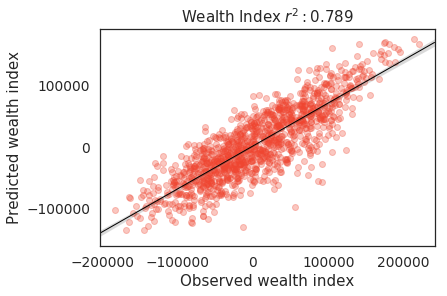

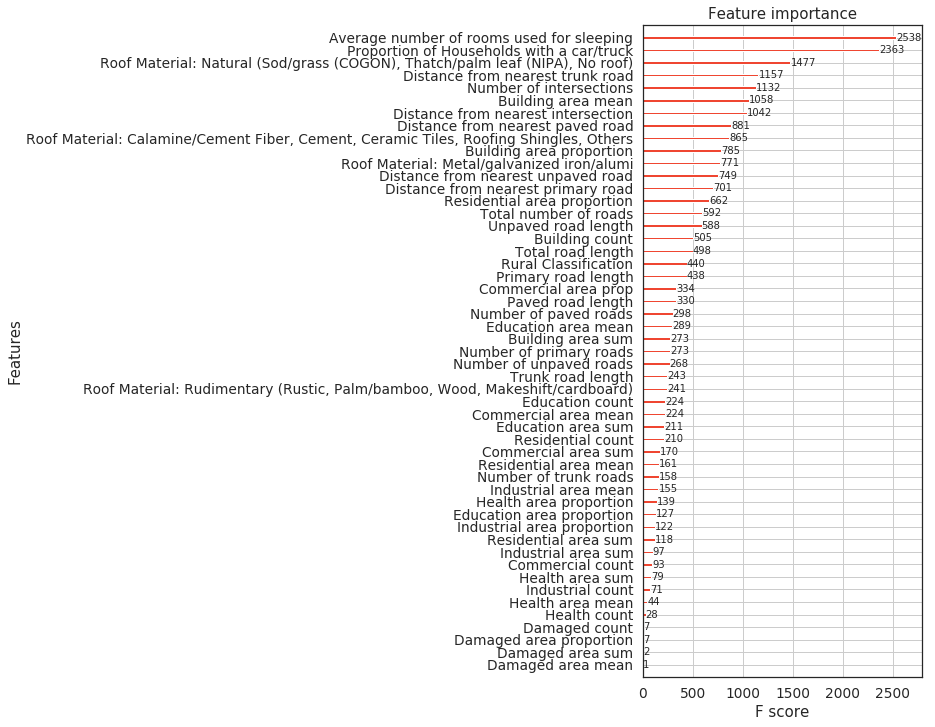

Socioeconomic indicator: Log Wealth Index
train_neg_mse : -0.0466
[-0.04460726 -0.0427167  -0.04501379 -0.03075625 -0.06977315]
fit_time : 610.6216
[607.21627903 610.68247628 609.84303141 615.98813868 609.37805462]
train_r2 : 0.8550
[0.8750183  0.87828316 0.87311695 0.84583478 0.80253735]
score_time : 0.0213
[0.01168704 0.01143837 0.01138473 0.00951099 0.06261754]
test_r2 : 0.6049
[0.74903549 0.67835239 0.72079549 0.32091043 0.55536175]
test_neg_mse : -0.1624
[-0.04606556 -0.06827964 -0.05502274 -0.55274645 -0.08987815]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8106740918709316, gamma=1.1864256931141761,
       learning_rate=0.015685516382344375, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=1128, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, 

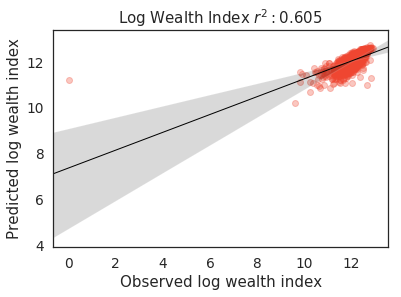

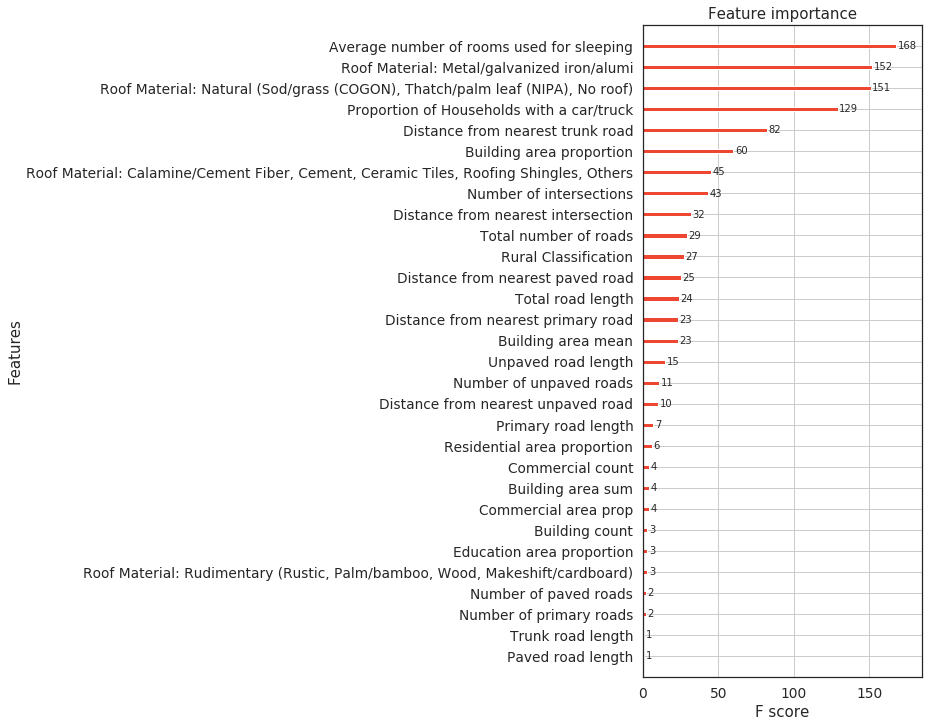

Socioeconomic indicator: Education completed (years)
train_neg_mse : -0.4457
[-0.29456817 -0.39797861 -0.29873767 -0.30728607 -0.93007834]
fit_time : 635.0254
[637.40475011 633.7156601  634.82092071 633.71428871 635.47126865]
train_r2 : 0.9193
[0.94743422 0.92557376 0.94630973 0.94341028 0.83376112]
score_time : 0.0404
[0.03959274 0.01629233 0.03781295 0.03368998 0.07455659]
test_r2 : 0.6045
[0.60435348 0.60686327 0.57751865 0.6276901  0.60603521]
test_neg_mse : -2.1677
[-2.00214644 -2.41861723 -2.21593096 -2.16664982 -2.03497171]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9690296273879275, gamma=4.048687450510388,
       learning_rate=0.017882705102953193, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=360, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, se

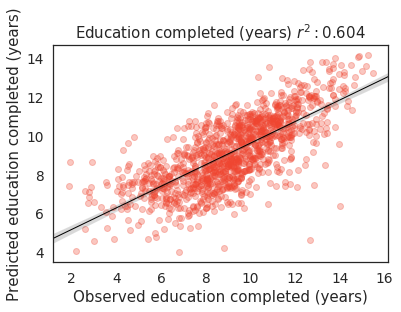

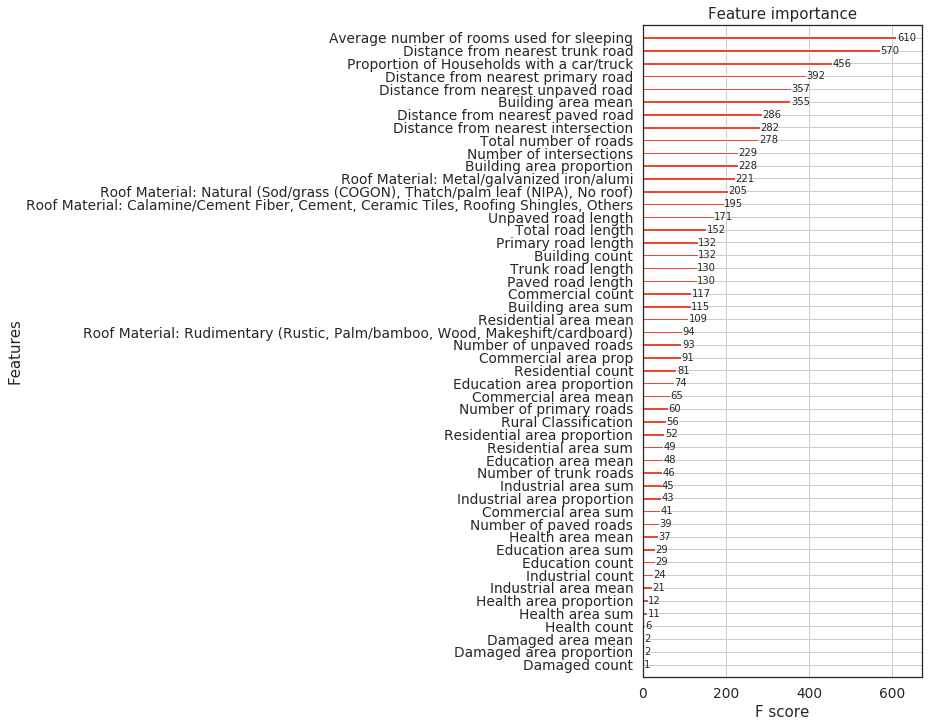

Socioeconomic indicator: Access to electricity
train_neg_mse : -0.0114
[-0.01087639 -0.01134432 -0.01091494 -0.01163788 -0.01234742]
fit_time : 423.5591
[424.74321699 423.16729069 424.71065593 423.19607878 421.97849011]
train_r2 : 0.4569
[0.5288882  0.47394903 0.46560108 0.41143878 0.4048112 ]
score_time : 0.0101
[0.01045656 0.00989032 0.00979781 0.01050329 0.01000071]
test_r2 : 0.3190
[0.31178778 0.25136233 0.34643769 0.33823875 0.3472767 ]
test_neg_mse : -0.0142
[-0.00888755 -0.0144579  -0.01558781 -0.01742812 -0.01477618]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8106740918709316, gamma=0.6508959563110073,
       learning_rate=0.19734127612173394, max_delta_step=0, max_depth=5,
       min_child_weight=2, missing=None, n_estimators=1734, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=No

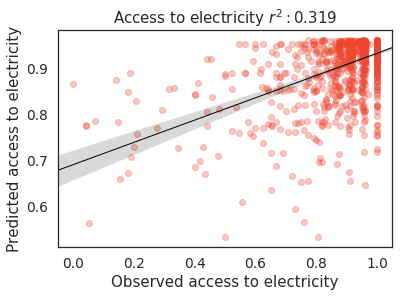

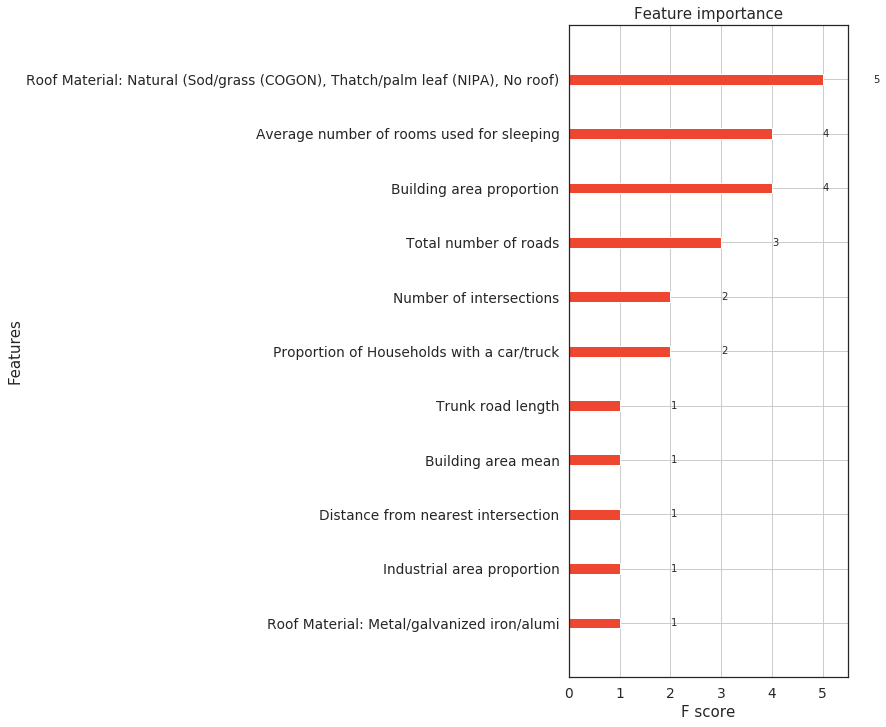

Socioeconomic indicator: Access to water (minutes)
train_neg_mse : -47.2085
[-30.56675063 -47.11230866 -49.66829502 -54.21998932 -54.47498159]
fit_time : 650.7378
[651.2019515  648.91868782 650.68196559 650.61086035 652.27534628]
train_r2 : 0.2959
[0.26704061 0.29723868 0.31972144 0.30444035 0.29112748]
score_time : 0.0131
[0.01252484 0.01192164 0.01201987 0.01172996 0.017519  ]
test_r2 : -0.0213
[ 0.03304932  0.06192818  0.00303609 -0.211123    0.00636199]
test_neg_mse : -66.1470
[-163.56271497  -64.20351696  -44.37110725  -29.68250198  -28.91528764]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8831860127324898, gamma=3.0645035819209245,
       learning_rate=0.003156692644579374, max_delta_step=0, max_depth=3,
       min_child_weight=4, missing=None, n_estimators=453, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, 

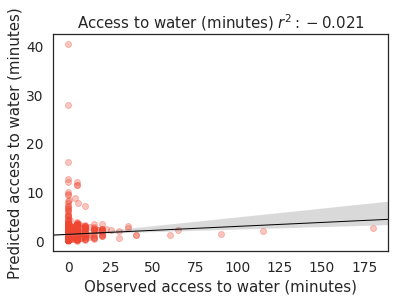

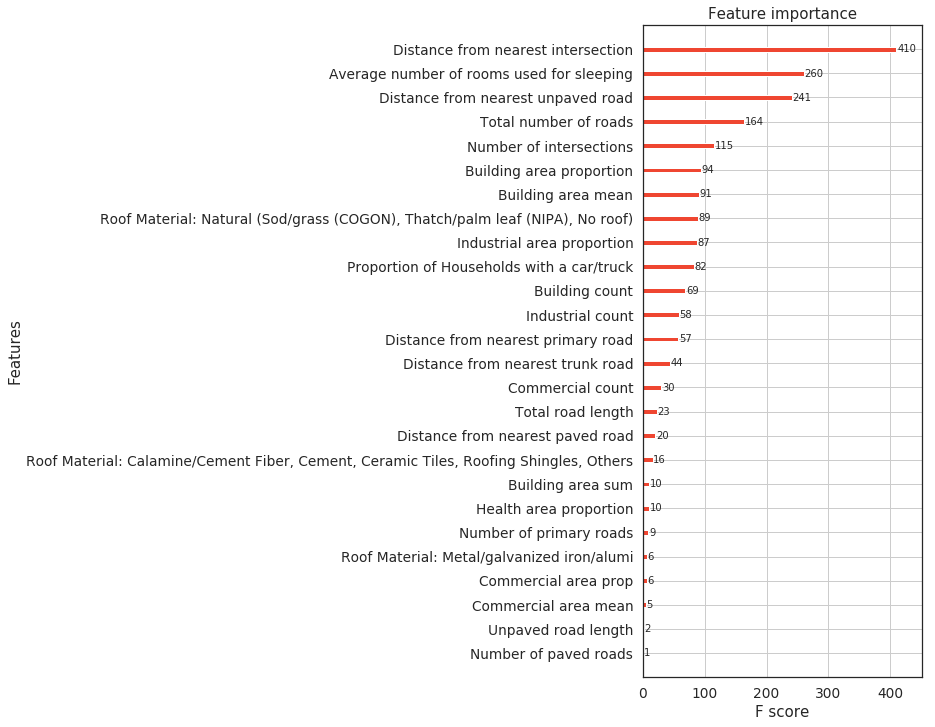

In [10]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=dhs_features_cols, 
    indicator_cols=indicators,
    scoring=scoring,
    model_type='xgboost', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=50,
    plot_importance=True,
    figsize=(5,12)
)

### Lasso Regression

Socioeconomic indicator: Wealth Index
train_neg_mse : -1269124042.1937
[-1.26015326e+09 -1.25053173e+09 -1.35298841e+09 -1.26046286e+09
 -1.22148395e+09]
fit_time : 6.1399
[6.32874036 5.52957988 7.00274682 6.65118718 5.18723774]
train_r2 : 0.7478
[0.74707144 0.74689714 0.73931029 0.74648442 0.75921086]
score_time : 0.1914
[0.29145384 0.26750326 0.13997698 0.07443213 0.18381739]
test_r2 : 0.5780
[0.70227124 0.71706884 0.74957899 0.71877833 0.00220471]
test_neg_mse : -2098578178.5848
[-1.52842840e+09 -1.52807520e+09 -1.09955435e+09 -1.47701349e+09
 -4.85981945e+09]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=1.49816047538945, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False))])


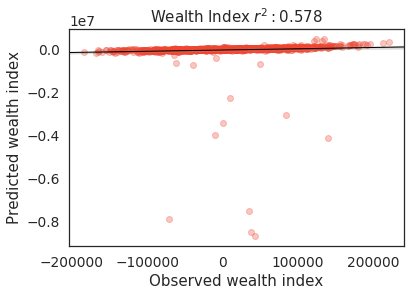

Socioeconomic indicator: Log Wealth Index
train_neg_mse : -0.2226
[-0.25152716 -0.24871135 -0.24860728 -0.11321366 -0.25099042]
fit_time : 1.0894
[0.77008247 1.52102327 1.19579983 0.9364574  1.02340198]
train_r2 : 0.3216
[0.29526514 0.29132255 0.29923585 0.43251826 0.28968045]
score_time : 0.0874
[0.14666653 0.02140737 0.05309391 0.01755571 0.19803143]
test_r2 : 0.3324
[0.35424803 0.37891118 0.33609484 0.16571441 0.42727585]
test_neg_mse : -0.2352
[-0.11853041 -0.13184528 -0.13083557 -0.6790686  -0.11576913]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=3.8028572256396647, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])


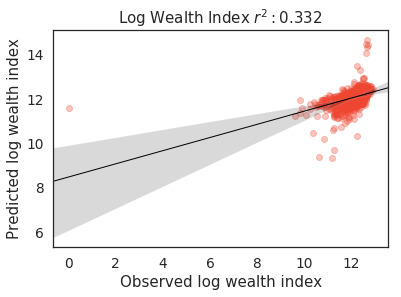

Socioeconomic indicator: Education completed (years)
train_neg_mse : -3.4260
[-3.46660913 -3.36222897 -3.37470735 -3.44825083 -3.47813672]
fit_time : 2.3527
[2.07835746 1.58516598 2.90472174 2.87998843 2.31535816]
train_r2 : 0.3779
[0.38138251 0.37122733 0.39348473 0.36497106 0.37833026]
score_time : 0.1572
[0.18808961 0.27402139 0.21820545 0.08897066 0.01689577]
test_r2 : 0.3319
[0.29782122 0.33059963 0.27147807 0.39183074 0.36756157]
test_neg_mse : -3.6597
[-3.55333528 -4.11821929 -3.82112557 -3.53922847 -3.26677494]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=3.8028572256396647, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])


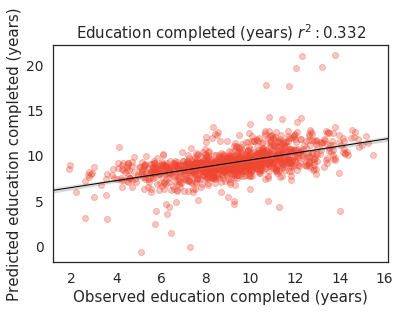

Socioeconomic indicator: Access to electricity
train_neg_mse : -0.0161
[-0.01709835 -0.01626902 -0.01584086 -0.01547624 -0.01595313]
fit_time : 0.6994
[0.77325964 0.69210005 0.64311552 0.64245701 0.74598193]
train_r2 : 0.2355
[0.25938322 0.24558421 0.22442624 0.21732212 0.23100323]
score_time : 0.0168
[0.05003953 0.00802302 0.00235772 0.01965022 0.00380659]
test_r2 : 0.1539
[-0.04971558  0.13863868  0.20880599  0.24730991  0.22469523]
test_neg_mse : -0.0173
[-0.013556   -0.01663485 -0.0188704  -0.01982282 -0.01755115]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=3.8028572256396647, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])


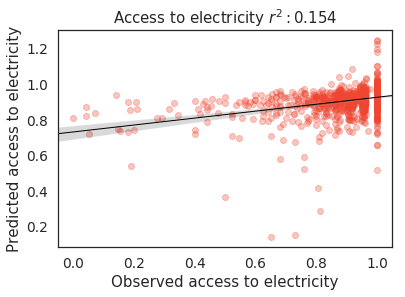

Socioeconomic indicator: Access to water (minutes)
train_neg_mse : -65.4076
[-40.02362562 -67.03884685 -73.01170183 -70.11653974 -76.84736027]
fit_time : 1.2349
[1.14894032 1.14439821 1.44677854 1.46754193 0.96660757]
train_r2 : 0.0282
[0.04027443 0.         0.         0.10051189 0.        ]
score_time : 0.0523
[0.14953971 0.03979969 0.00220752 0.00724721 0.06274295]
test_r2 : -0.0229
[ 6.19958962e-02 -1.68277077e-04 -2.88626436e-03 -1.73514022e-01
 -4.21071745e-05]
test_neg_mse : -65.9234
[-158.66631148  -68.45352301  -44.63468886  -28.76077196  -29.10164966]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=1.49816047538945, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False))])


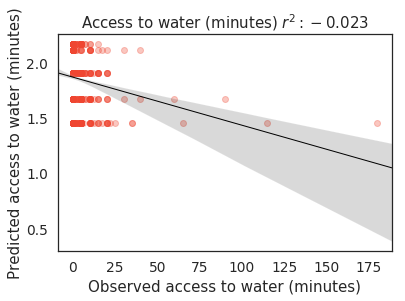

In [7]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=dhs_features_cols, 
    indicator_cols=indicators, 
    scoring=scoring,
    model_type='lasso', 
    refit='r2', 
    search_type='grid', 
    n_splits=5
)

### Ridge Regression

Socioeconomic indicator: Wealth Index
train_neg_mse : -1286168334.4718
[-1.26279976e+09 -1.25233105e+09 -1.35462209e+09 -1.26212668e+09
 -1.29896208e+09]
fit_time : 0.9974
[0.97202325 0.87136078 1.0070734  1.21263027 0.92376065]
train_r2 : 0.7444
[0.74654025 0.74653297 0.73899552 0.74614977 0.74393773]
score_time : 0.0882
[0.09449911 0.19544959 0.04573178 0.0593667  0.04577923]
test_r2 : 0.7244
[0.70601852 0.71803603 0.74849871 0.71668589 0.73296999]
test_neg_mse : -1384985753.6062
[-1.50919122e+09 -1.52285152e+09 -1.10429771e+09 -1.48800328e+09
 -1.30058504e+09]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=0.6239780813448106, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=42, solver='auto',
   tol=0.001))])


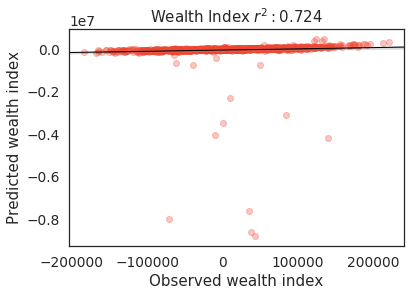

Socioeconomic indicator: Log Wealth Index
train_neg_mse : -0.1690
[-0.19171074 -0.1915901  -0.19775672 -0.0672208  -0.19650286]
fit_time : 0.9200
[0.772403   1.06822562 1.08210254 0.8081162  0.86904359]
train_r2 : 0.4933
[0.46286023 0.45408368 0.44257135 0.66305676 0.44388386]
score_time : 0.0451
[0.05443811 0.03155375 0.09214115 0.04525805 0.00215626]
test_r2 : 0.4332
[0.59645062 0.54786725 0.63620322 0.27198181 0.11333374]
test_neg_mse : -0.2027
[-0.07407314 -0.09597914 -0.07169331 -0.59257202 -0.17922866]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=2.3946339367881464, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=42, solver='auto',
   tol=0.001))])


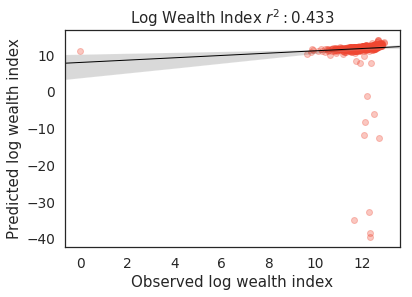

Socioeconomic indicator: Education completed (years)
train_neg_mse : -2.2976
[-2.30275793 -2.26819235 -2.27525172 -2.3011679  -2.34051168]
fit_time : 1.2879
[1.53501058 1.17040753 1.40709615 1.41019511 0.91701198]
train_r2 : 0.5828
[0.58907212 0.57582384 0.59108309 0.57621754 0.5816653 ]
score_time : 0.0519
[0.0021956  0.08751893 0.14176464 0.02495861 0.0033052 ]
test_r2 : 0.5326
[0.48775708 0.56350704 0.4892088  0.56631843 0.5562448 ]
test_neg_mse : -2.5545
[-2.59217576 -2.68534917 -2.67911949 -2.52380098 -2.29215732]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=0.6239780813448106, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=42, solver='auto',
   tol=0.001))])


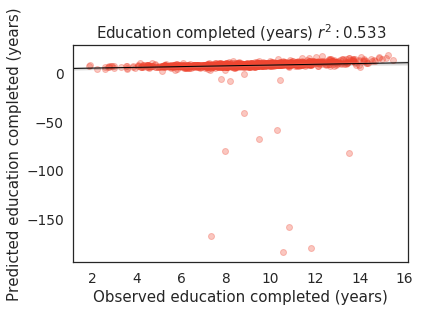

Socioeconomic indicator: Access to electricity
train_neg_mse : -0.0137
[-0.01428549 -0.01372492 -0.01351433 -0.0131675  -0.01389696]
fit_time : 1.1606
[1.26362419 1.01433444 1.06268358 0.9924407  1.47006464]
train_r2 : 0.3495
[0.38122271 0.36355753 0.3383336  0.33408133 0.33011781]
score_time : 0.1019
[0.04868579 0.02886939 0.21727753 0.16758513 0.04728127]
test_r2 : 0.2070
[0.05970487 0.17257395 0.35707934 0.38125423 0.06454035]
test_neg_mse : -0.0162
[-0.01214294 -0.01597948 -0.015334   -0.01629526 -0.02117669]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=2.3946339367881464, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=42, solver='auto',
   tol=0.001))])


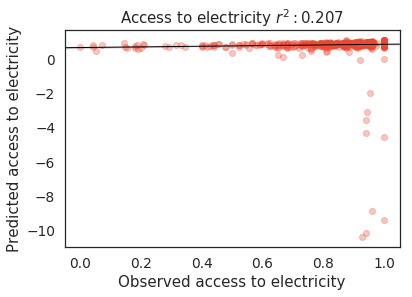

Socioeconomic indicator: Access to water (minutes)
train_neg_mse : -62.5267
[-39.19400619 -61.95473349 -67.44990258 -72.19215275 -71.84277469]
fit_time : 1.3318
[1.57087779 1.63946128 0.97965384 1.66534066 0.80378366]
train_r2 : 0.0702
[0.06016785 0.07583832 0.07617682 0.07388495 0.06512371]
score_time : 0.0790
[0.04165554 0.02524996 0.23443317 0.07760763 0.01624036]
test_r2 : 0.0240
[0.04629628 0.03429877 0.02221692 0.01241111 0.0048324 ]
test_neg_mse : -64.8196
[-161.32195073  -66.09452891  -43.51744053  -24.20407287  -28.95979949]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=2.3946339367881464, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=42, solver='auto',
   tol=0.001))])


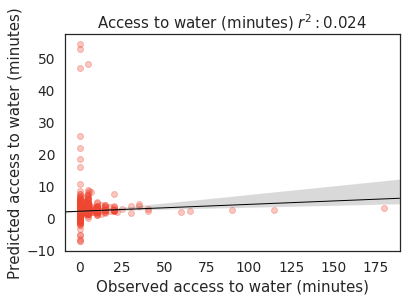

In [8]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=dhs_features_cols, 
    indicator_cols=indicators, 
    scoring=scoring,
    model_type='ridge', 
    refit='r2', 
    search_type='grid', 
    n_splits=5
)